In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

In [2]:
df=pd.read_csv("Weekly_Boarding1.csv")

C:\Users\bhole\AppData\Local\Temp\ipykernel_8780\2364992990.py:1: DtypeWarning: Columns (1,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Weekly_Boarding1.csv")


In [3]:
df.shape

(10857234, 13)

In [4]:
df.columns

Index(['TripID', 'RouteID', 'StopID', 'StopName', 'WeekBeginning',
       'NumberOfBoardings', 'formatted_address', 'latitude', 'longitude',
       'postcode', 'type', 'route_desc', 'dist_from_centre'],
      dtype='object')

In [5]:
df.head()

,TripID,RouteID,StopID,StopName,WeekBeginning,NumberOfBoardings,formatted_address,latitude,longitude,postcode,type,route_desc,dist_from_centre
0,23631,100,14156,181 Cross Rd,2013-06-30,1,"181 Cross Rd, Westbourne Park SA 5041, Australia",-34.966656,138.592148,5041,street_address,"via Woodville Road, Holbrooks Road, Marion Roa...",5.180961
1,23631,100,14144,177 Cross Rd,2013-06-30,1,"177 Cross Rd, Westbourne Park SA 5041, Australia",-34.966607,138.592301,5041,street_address,"via Woodville Road, Holbrooks Road, Marion Roa...",5.172525
2,23632,100,14132,175 Cross Rd,2013-06-30,1,"175 Cross Rd, Westbourne Park SA 5041, Australia",-34.966758,138.592715,5041,street_address,"via Woodville Road, Holbrooks Road, Marion Roa...",5.180709
3,23633,100,12266,Zone A Arndale Interchange,2013-06-30,2,"Zone A Arndale Interchange - South side, Kilke...",-34.875160,138.551628,5009,transit_station,"via Woodville Road, Holbrooks Road, Marion Roa...",7.057549
4,23633,100,14147,178 Cross Rd,2013-06-30,1,"178 Cross Rd, Malvern SA 5061, Australia",-34.964960,138.611477,5061,street_address,"via Woodville Road, Holbrooks Road, Marion Roa...",4.900099


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10857234 entries, 0 to 10857233
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TripID             int64  
 1   RouteID            object 
 2   StopID             int64  
 3   StopName           object 
 4   WeekBeginning      object 
 5   NumberOfBoardings  int64  
 6   formatted_address  object 
 7   latitude           float64
 8   longitude          float64
 9   postcode           object 
 10  type               object 
 11  route_desc         object 
 12  dist_from_centre   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 1.1+ GB


In [7]:
df['route_desc'].value_counts()

via Flinders University, Goodwood Road, City & Prospect Road. Service operates 7 days.                                                                                                                                              358005
via City & O-bahn. Service operates 7 days.                                                                                                                                                                                         331442
via Military Road, Henley Beach Road, City, Coorara Avenue & Stradbroke Road. Service operates 7 days.                                                                                                                              326004
via Main North Road. Service operates 7 days.                                                                                                                                                                                       230667
via Regency Road, Burnside Village, Cross Road, Flinders Uni

In [8]:
df['StopName'].value_counts()

2 King William Rd                 46398
D1 Currie St                      44089
I2 North Tce                      43339
W3 Currie St                      43265
G3 Grenfell St                    36992
                                  ...  
51 Bains Rd                           1
53 O Sullivan Beach Rd                1
School Urrbrae College School         1
Quix John Rice Ave / Commercia        1
27 Rangeview Rd                       1
Name: StopName, Length: 4165, dtype: int64

In [9]:
df['WeekBeginning'].value_counts()

2014-03-02    217162
2014-05-18    215932
2014-05-11    214947
2014-06-01    213789
2014-05-04    212681
2014-03-23    212552
2014-03-16    212188
2014-02-23    212103
2013-09-08    211914
2014-04-27    211782
2014-05-25    211534
2014-03-30    211460
2013-09-01    210968
2014-04-06    210557
2013-08-25    209497
2013-11-17    209341
2013-11-24    208881
2013-10-20    208655
2013-12-01    208470
2014-06-15    208457
2014-06-08    208417
2013-09-15    208241
2014-02-16    208178
2013-10-27    207971
2013-09-22    207769
2013-12-08    207353
2013-10-13    207351
2013-08-04    207082
2013-11-03    206863
2013-11-10    206853
2014-06-29    206138
2013-07-28    205492
2013-08-11    205385
2013-08-18    203852
2013-07-21    201257
2014-06-22    200950
2014-02-09    197978
2014-01-19    196344
2013-10-06    195830
2014-03-09    195200
2013-12-15    194102
2014-02-02    192507
2013-09-29    192023
2013-07-07    190543
2014-04-13    190060
2013-07-14    187192
2014-01-05    186105
2014-04-20   

In [10]:
df['type'].value_counts()

street_address        6653561
transit_station       1604089
premise               1307928
route                 1127183
political               71201
point_of_interest       46607
intersection            34142
subpremise               5892
school                   5248
real_estate_agency        525
university                470
restaurant                303
supermarket                57
travel_agency              21
store                       4
post_office                 3
Name: type, dtype: int64

<AxesSubplot:>

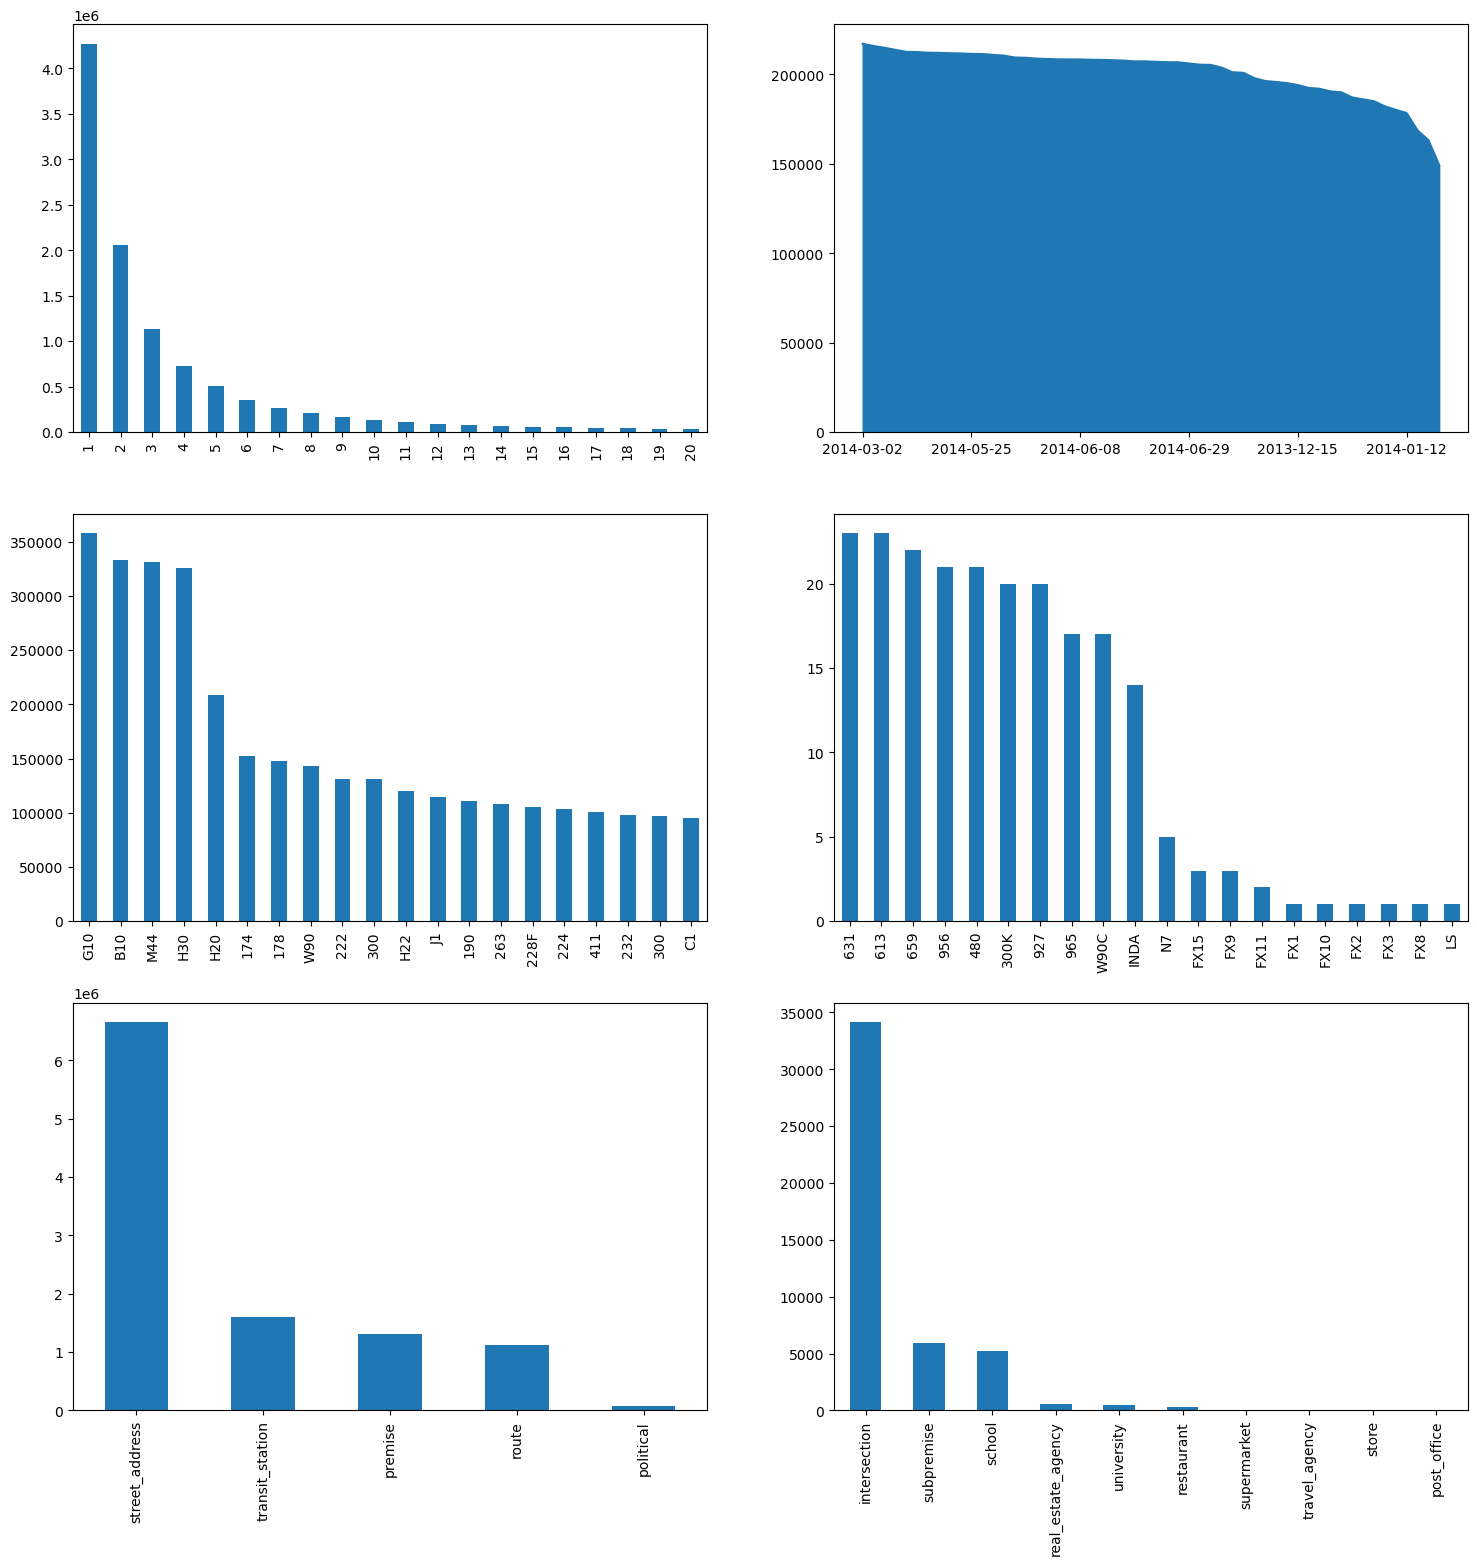

In [11]:
fig,axrr=plt.subplots(3,2,figsize=(18,18))

df['NumberOfBoardings'].value_counts().sort_index().head(20).plot.bar(ax=axrr[0][0])
df['WeekBeginning'].value_counts().plot.area(ax=axrr[0][1])
df['RouteID'].value_counts().head(20).plot.bar(ax=axrr[1][0])
df['RouteID'].value_counts().tail(20).plot.bar(ax=axrr[1][1])
df['type'].value_counts().head(5).plot.bar(ax=axrr[2][0])
df['type'].value_counts().tail(10).plot.bar(ax=axrr[2][1])

In [12]:
df.isna().sum()

TripID                     0
RouteID                    0
StopID                     0
StopName                   0
WeekBeginning              0
NumberOfBoardings          0
formatted_address       3506
latitude                   0
longitude                  0
postcode              425081
type                       0
route_desc           2106618
dist_from_centre           0
dtype: int64

In [13]:
#checking null values percentage
df.isnull().sum()*100/len(df)

TripID                0.000000
RouteID               0.000000
StopID                0.000000
StopName              0.000000
WeekBeginning         0.000000
NumberOfBoardings     0.000000
formatted_address     0.032292
latitude              0.000000
longitude             0.000000
postcode              3.915187
type                  0.000000
route_desc           19.402898
dist_from_centre      0.000000
dtype: float64

In [14]:
#checking duplicates
df.duplicated().sum()

0

In [15]:
def holiday_label (row):
    if row == datetime.date(2013, 9, 1) :
          return '1'
    if row == datetime.date(2013, 10, 6) :
          return '1'
    if row == datetime.date(2013, 12, 22) :
          return '2'
    if row == datetime.date(2013, 12, 29):
          return '1'
    if row  == datetime.date(2014, 1, 26):
          return '1'
    if row == datetime.date(2014, 3, 9):
          return '1'
    if row == datetime.date(2014, 4, 13) :
          return '2'
    if row == datetime.date(2014, 4, 20):
          return '2'
    if row == datetime.date(2014, 6, 8):
          return '1'
    return '0'

In [16]:
import datetime
df['WeekBeginning'] = pd.to_datetime(df['WeekBeginning']).dt.date

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10857234 entries, 0 to 10857233
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TripID             int64  
 1   RouteID            object 
 2   StopID             int64  
 3   StopName           object 
 4   WeekBeginning      object 
 5   NumberOfBoardings  int64  
 6   formatted_address  object 
 7   latitude           float64
 8   longitude          float64
 9   postcode           object 
 10  type               object 
 11  route_desc         object 
 12  dist_from_centre   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 1.1+ GB


In [18]:
df['holiday_label'] = df['WeekBeginning'].apply (lambda row: holiday_label(row))

In [19]:
df.columns

Index(['TripID', 'RouteID', 'StopID', 'StopName', 'WeekBeginning',
       'NumberOfBoardings', 'formatted_address', 'latitude', 'longitude',
       'postcode', 'type', 'route_desc', 'dist_from_centre', 'holiday_label'],
      dtype='object')

In [20]:
df.shape

(10857234, 14)

# Analysis the data

In [21]:
# st_week_grp1 = pd.DataFrame(data.groupby(['StopName','WeekBeginning','type']).agg({'NumberOfBoardings': ['sum', 'count']})).reset_index()
grouped = df.groupby(['StopName','WeekBeginning','type']).agg({'NumberOfBoardings': ['sum', 'count','max']})
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]

C:\Users\bhole\AppData\Local\Temp\ipykernel_8780\2343479785.py:3: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]


In [22]:
grouped.head()

NumberOfBoardings_sum  \
StopName    WeekBeginning type                                    
1 Anzac Hwy 2013-06-30    street_address                   1003   
            2013-07-07    street_address                    783   
            2013-07-14    street_address                    843   
            2013-07-21    street_address                    710   
            2013-07-28    street_address                    898   

                                          NumberOfBoardings_count  \
StopName    WeekBeginning type                                      
1 Anzac Hwy 2013-06-30    street_address                      378   
            2013-07-07    street_address                      360   
            2013-07-14    street_address                      343   
            2013-07-21    street_address                      356   
            2013-07-28    street_address                      379   

                                          NumberOfBoardings_max  
StopName    WeekBeginning type                                   
1 Anzac Hwy 2013-06-30    street_address                     51  
            2013-07-07    street_address                     28  
            2013-07-14    street_address                     45  
            2013-07-21    street_address                     28  
            2013-07-28    street_address                     41

In [23]:
grouped.shape

(207864, 3)

In [24]:
st_week_grp = pd.DataFrame(grouped).reset_index()
st_week_grp.head()

,StopName,WeekBeginning,type,NumberOfBoardings_sum,NumberOfBoardings_count,NumberOfBoardings_max
0,1 Anzac Hwy,2013-06-30,street_address,1003,378,51
1,1 Anzac Hwy,2013-07-07,street_address,783,360,28
2,1 Anzac Hwy,2013-07-14,street_address,843,343,45
3,1 Anzac Hwy,2013-07-21,street_address,710,356,28
4,1 Anzac Hwy,2013-07-28,street_address,898,379,41


In [25]:
st_week_grp.shape

(207864, 6)

In [26]:
#as per each stop name count the no of boarding
st_week_grp1 = pd.DataFrame(st_week_grp.groupby('StopName')["WeekBeginning"].count()).reset_index()
st_week_grp1.head()

,StopName,WeekBeginning
0,1 Anzac Hwy,54
1,1 Bartels Rd,54
2,1 Botanic Rd,54
3,1 Frome Rd,54
4,1 Fullarton Rd,54


In [27]:
st_week_grp1['WeekBeginning'].value_counts()
#54 weeks data available in 3249 stops

54    3249
53     113
52      76
51      44
41      37
50      33
40      31
48      31
47      26
2       24
45      23
49      21
46      20
1       19
34      18
20      18
27      17
35      17
9       15
42      15
37      14
44      13
17      13
24      13
39      12
32      12
38      12
12      11
8       11
43      11
26      11
30      11
15      11
16      10
11      10
23      10
6       10
31      10
21      10
29       9
4        9
22       9
3        9
7        8
5        8
33       8
36       7
28       7
18       6
10       6
13       5
19       5
14       4
25       3
Name: WeekBeginning, dtype: int64

In [28]:
#Gathering only the Stop Name which having all 54 weeks of Data
aa = list(st_week_grp1[st_week_grp1['WeekBeginning'] == 54]['StopName'])
aa[1:10]

['1 Bartels Rd',
 '1 Botanic Rd',
 '1 Frome Rd',
 '1 Fullarton Rd',
 '1 George St',
 '1 Glen Osmond Rd',
 '1 Goodwood Rd',
 '1 Henley Beach Rd',
 '1 Kensington Rd']

In [29]:
len(aa)

3249

In [30]:
bb = st_week_grp[st_week_grp['StopName'].isin(aa)]
bb.head()

,StopName,WeekBeginning,type,NumberOfBoardings_sum,NumberOfBoardings_count,NumberOfBoardings_max
0,1 Anzac Hwy,2013-06-30,street_address,1003,378,51
1,1 Anzac Hwy,2013-07-07,street_address,783,360,28
2,1 Anzac Hwy,2013-07-14,street_address,843,343,45
3,1 Anzac Hwy,2013-07-21,street_address,710,356,28
4,1 Anzac Hwy,2013-07-28,street_address,898,379,41


In [31]:
bb.shape

(175446, 6)

In [32]:
#removing the stoppage which are not having the data of whole 54 weeks
new_data = df[df['StopName'].isin(aa)]
new_data.shape
print("data without stopage removing: ", df.shape)
print("data, after removing stoppage not having the data of whole 54 weeks: ", new_data.shape)

data without stopage removing:  (10857234, 14)
data, after removing stoppage not having the data of whole 54 weeks:  (10567931, 14)


In [33]:
#No of boarding for each stopage in all weeks
#bb["StopName"].groupby(NumberOfBoardings_sum)
stopageName_with_boarding = bb.groupby(['StopName']).agg({'NumberOfBoardings_sum': ['sum']})

#stopageName_with_boarding.columns = ["_".join(x) for x in stopageName_with_boarding.columns.ravel()]
#stopageName_with_boarding.head()
stopageName_with_boarding = pd.DataFrame(stopageName_with_boarding.reset_index())

In [34]:
stopageName_with_boarding.head()

,StopName,NumberOfBoardings_sum
,,sum
0,1 Anzac Hwy,39429
1,1 Bartels Rd,8412
2,1 Botanic Rd,14868
3,1 Frome Rd,67458
4,1 Fullarton Rd,585


In [35]:
#type(stopageName_with_boarding)
stopageName_with_boarding.columns = ["StopName","Total_boarding_on_the_stopage"]
#stopageName_with_boarding.shape
stopageName_with_boarding.head()

,StopName,Total_boarding_on_the_stopage
0,1 Anzac Hwy,39429
1,1 Bartels Rd,8412
2,1 Botanic Rd,14868
3,1 Frome Rd,67458
4,1 Fullarton Rd,585


# handling the null values

In [36]:
df.isnull().sum()*100/len(df)

TripID                0.000000
RouteID               0.000000
StopID                0.000000
StopName              0.000000
WeekBeginning         0.000000
NumberOfBoardings     0.000000
formatted_address     0.032292
latitude              0.000000
longitude             0.000000
postcode              3.915187
type                  0.000000
route_desc           19.402898
dist_from_centre      0.000000
holiday_label         0.000000
dtype: float64

In [37]:
df['route_desc'] = df['route_desc'].fillna('others')

In [38]:
df['formatted_address'].isna().sum()

3506

In [39]:
df['formatted_address']=df['formatted_address'].fillna('others')

In [40]:
cleaned=df.dropna()

In [41]:
df.isnull().sum()*100/len(df)

TripID               0.000000
RouteID              0.000000
StopID               0.000000
StopName             0.000000
WeekBeginning        0.000000
NumberOfBoardings    0.000000
formatted_address    0.000000
latitude             0.000000
longitude            0.000000
postcode             3.915187
type                 0.000000
route_desc           0.000000
dist_from_centre     0.000000
holiday_label        0.000000
dtype: float64

In [42]:
cleaned.shape

(10432153, 14)

## import output_geo dataset and merge data which are required for model

In [43]:
out_geo=pd.read_csv("output_geo.csv")

In [44]:
out_geo.shape

(4165, 10)

In [45]:
from math import sin, cos, sqrt, atan2, radians
def calc_dist(lat1,lon1):
    ## approximate radius of earth in km
    R = 6373.0
    dlon = radians(138.604801) - radians(lon1)
    dlat = radians(-34.921247) - radians(lat1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(-34.921247)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [46]:
out_geo['dist_from_centre'] = out_geo[['latitude','longitude']].apply(lambda x: calc_dist(*x), axis=1)

In [47]:
out_geo.head()

,accuracy,formatted_address,google_place_id,input_string,latitude,longitude,number_of_results,postcode,status,type,dist_from_centre
0,ROOFTOP,"181 Cross Rd, Westbourne Park SA 5041, Australia",ChIJKT7I9rbPsGoRVHMHkIy-Oyk,181 Cross Rd,-34.966656,138.592148,1,5041,OK,street_address,5.180961
1,ROOFTOP,"177 Cross Rd, Westbourne Park SA 5041, Australia",ChIJ-VFZ87bPsGoRyfVgC5qbPpE,177 Cross Rd,-34.966607,138.592301,1,5041,OK,street_address,5.172525
2,ROOFTOP,"175 Cross Rd, Westbourne Park SA 5041, Australia",ChIJIztlirbPsGoR38KRk76kPFI,175 Cross Rd,-34.966758,138.592715,1,5041,OK,street_address,5.180709
3,GEOMETRIC_CENTER,"Zone A Arndale Interchange - South side, Kilke...",ChIJn0C1hCPGsGoRIWvCdhF1RIg,Zone A Arndale Interchange,-34.875160,138.551628,1,5009,OK,"bus_station,establishment,point_of_interest,tr...",7.057549
4,ROOFTOP,"178 Cross Rd, Malvern SA 5061, Australia",ChIJycNiylvOsGoRdhfq9GKnpq0,178 Cross Rd,-34.964960,138.611477,1,5061,OK,street_address,4.900099


In [48]:
##Fill the missing values with mode
out_geo['type'].fillna('street_address',inplace=True)
out_geo['type'] = out_geo['type'].apply(lambda x: str(x).split(',')[-1])

In [49]:
out_geo.isna().sum()

accuracy               4
formatted_address      4
google_place_id        4
input_string           0
latitude               0
longitude              0
number_of_results      0
postcode             199
status                 0
type                   0
dist_from_centre       0
dtype: int64

In [50]:
bb1 = pd.merge(bb, out_geo, how='left', left_on = 'StopName', right_on = 'input_string')

In [51]:
bb1.head()

,StopName,WeekBeginning,type_x,NumberOfBoardings_sum,NumberOfBoardings_count,NumberOfBoardings_max,accuracy,formatted_address,google_place_id,input_string,latitude,longitude,number_of_results,postcode,status,type_y,dist_from_centre
0,1 Anzac Hwy,2013-06-30,street_address,1003,378,51,ROOFTOP,"1 Anzac Hwy, Keswick SA 5035, Australia",ChIJx2AyjwvPsGoRvAINzhi9VmA,1 Anzac Hwy,-34.942418,138.58183,1,5035,OK,street_address,3.151684
1,1 Anzac Hwy,2013-07-07,street_address,783,360,28,ROOFTOP,"1 Anzac Hwy, Keswick SA 5035, Australia",ChIJx2AyjwvPsGoRvAINzhi9VmA,1 Anzac Hwy,-34.942418,138.58183,1,5035,OK,street_address,3.151684
2,1 Anzac Hwy,2013-07-14,street_address,843,343,45,ROOFTOP,"1 Anzac Hwy, Keswick SA 5035, Australia",ChIJx2AyjwvPsGoRvAINzhi9VmA,1 Anzac Hwy,-34.942418,138.58183,1,5035,OK,street_address,3.151684
3,1 Anzac Hwy,2013-07-21,street_address,710,356,28,ROOFTOP,"1 Anzac Hwy, Keswick SA 5035, Australia",ChIJx2AyjwvPsGoRvAINzhi9VmA,1 Anzac Hwy,-34.942418,138.58183,1,5035,OK,street_address,3.151684
4,1 Anzac Hwy,2013-07-28,street_address,898,379,41,ROOFTOP,"1 Anzac Hwy, Keswick SA 5035, Australia",ChIJx2AyjwvPsGoRvAINzhi9VmA,1 Anzac Hwy,-34.942418,138.58183,1,5035,OK,street_address,3.151684


In [52]:
bb1['holiday_label'] = bb1['WeekBeginning'].apply (lambda row: holiday_label(row))

In [53]:
##Final 11 features have been used for the forecastng.
cols = ['StopName','WeekBeginning','type_x','NumberOfBoardings_sum','NumberOfBoardings_count','NumberOfBoardings_max','latitude','longitude','postcode','dist_from_centre','holiday_label']
bb1=bb1[cols]


In [54]:
bb1.shape

(175446, 11)

In [55]:
bb1.isna().sum()

StopName                      0
WeekBeginning                 0
type_x                        0
NumberOfBoardings_sum         0
NumberOfBoardings_count       0
NumberOfBoardings_max         0
latitude                      0
longitude                     0
postcode                   6318
dist_from_centre              0
holiday_label                 0
dtype: int64

In [56]:
##Replace all Nan by Mode
for i in bb1.columns:
    bb1[i].fillna(bb1[i].mode()[0], inplace=True)
bb1[["postcode", "holiday_label"]] = bb1[["postcode", "holiday_label"]].apply(pd.to_numeric)

In [57]:
bb1.isna().sum()

StopName                   0
WeekBeginning              0
type_x                     0
NumberOfBoardings_sum      0
NumberOfBoardings_count    0
NumberOfBoardings_max      0
latitude                   0
longitude                  0
postcode                   0
dist_from_centre           0
holiday_label              0
dtype: int64

# model creation

In [58]:
bb1["WeekBeginning"] = bb1[["WeekBeginning"]].apply(pd.to_datetime)

In [59]:
from datetime import datetime
train = bb1[bb1['WeekBeginning'] < datetime.strptime("2014-06-01","%Y-%m-%d")]
test = bb1[bb1['WeekBeginning'] >= datetime.strptime("2014-06-01","%Y-%m-%d")]

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['WeekBeginning'] = le.fit_transform(train['WeekBeginning'])
test['WeekBeginning'] = le.fit_transform(test['WeekBeginning'])

C:\Users\bhole\AppData\Local\Temp\ipykernel_8780\3417846909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['WeekBeginning'] = le.fit_transform(train['WeekBeginning'])
C:\Users\bhole\AppData\Local\Temp\ipykernel_8780\3417846909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['WeekBeginning'] = le.fit_transform(test['WeekBeginning'])


In [61]:
tr_col = ['StopName', 'WeekBeginning', 'type_x', 'latitude',
       'longitude', 'postcode', 'dist_from_centre', 'holiday_label']

In [62]:
x_train = train[tr_col]
x_test = test[tr_col]

In [63]:
y_train = train["NumberOfBoardings_sum"]
y_test = test["NumberOfBoardings_sum"]

In [64]:
y_train.shape

(155952,)

In [65]:
y_test.shape

(19494,)

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['StopName'] = le.fit_transform(train['StopName'])
train['type_x'] = le.fit_transform(train['type_x'])

test['StopName'] = le.fit_transform(test['StopName'])
test['type_x'] = le.fit_transform(test['type_x'])

C:\Users\bhole\AppData\Local\Temp\ipykernel_8780\832640995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['StopName'] = le.fit_transform(train['StopName'])
C:\Users\bhole\AppData\Local\Temp\ipykernel_8780\832640995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['type_x'] = le.fit_transform(train['type_x'])
C:\Users\bhole\AppData\Local\Temp\ipykernel_8780\832640995.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [67]:
train.head()

,StopName,WeekBeginning,type_x,NumberOfBoardings_sum,NumberOfBoardings_count,NumberOfBoardings_max,latitude,longitude,postcode,dist_from_centre,holiday_label
0,0,0,7,1003,378,51,-34.942418,138.58183,5035,3.151684,0
1,0,1,7,783,360,28,-34.942418,138.58183,5035,3.151684,0
2,0,2,7,843,343,45,-34.942418,138.58183,5035,3.151684,0
3,0,3,7,710,356,28,-34.942418,138.58183,5035,3.151684,0
4,0,4,7,898,379,41,-34.942418,138.58183,5035,3.151684,0


In [68]:
x_train= train[tr_col]
x_test = test[tr_col] 

In [69]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_train=ms.fit_transform(x_train)
x_test=ms.fit_transform(x_test)

# Random forest regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=700, min_samples_leaf=3, max_features=0.5,n_jobs=-1)
model.fit(x_train,y_train)
preds = model.predict(x_test)

In [72]:
preds

array([ 891.01202655,  871.06574655,  786.23747357, ...,  829.89456773,
        973.57635744, 1020.11166104])

In [73]:
y_test=np.array(y_test)

In [74]:
np.concatenate((preds.reshape(-1,1), y_test.reshape(-1,1)),1)

array([[ 891.01202655,  613.        ],
       [ 871.06574655,  590.        ],
       [ 786.23747357,  700.        ],
       ...,
       [ 829.89456773,  896.        ],
       [ 973.57635744, 1052.        ],
       [1020.11166104,  534.        ]])

In [75]:
import sklearn.metrics
rms = sqrt(sklearn.metrics.mean_squared_error(y_test, preds))
rms

272.45442263303215

In [76]:
model.score(x_train,y_train)

0.9899321649162875

# LGBMRegressor(providing external parameter)

In [77]:
import lightgbm as lgb
model = lgb.LGBMRegressor(max_depth=10,learning_rate=0.0227,n_estimators=195,num_leaves=11,reg_alpha=1.5764,reg_lambda=0.0478,subsample=0.7776,colsample_bytree=0.7761)
model.fit(x_train,y_train)

LGBMRegressor(colsample_bytree=0.7761, learning_rate=0.0227, max_depth=10,
              n_estimators=195, num_leaves=11, reg_alpha=1.5764,
              reg_lambda=0.0478, subsample=0.7776)

In [78]:
y_pred=model.predict(x_test)

In [79]:
np.concatenate((y_pred.reshape(-1,1), y_test.reshape(-1,1)),1)

array([[ 264.22778347,  613.        ],
       [ 227.36382624,  590.        ],
       [ 264.22778347,  700.        ],
       ...,
       [1121.73452062,  896.        ],
       [1121.73452062, 1052.        ],
       [1121.73452062,  534.        ]])

In [80]:
model.score(x_train,y_train)

0.7168803741248257

In [81]:
import sklearn.metrics
rms = sqrt(sklearn.metrics.mean_squared_error(y_test, preds))
rms

272.45442263303215

# LGBMRegressor

In [82]:
import lightgbm as lgb
model = lgb.LGBMRegressor()
model.fit(x_train,y_train)

LGBMRegressor()

In [83]:
y_pred=model.predict(x_test)

In [84]:
np.concatenate((y_pred.reshape(-1,1), y_test.reshape(-1,1)),1)

array([[ 608.51786589,  613.        ],
       [ 563.38679335,  590.        ],
       [ 628.5502431 ,  700.        ],
       ...,
       [ 785.94637614,  896.        ],
       [1117.81282878, 1052.        ],
       [1117.81282878,  534.        ]])

In [85]:
model.score(x_train,y_train)

0.8573627160434282

In [86]:
import sklearn.metrics
rms = sqrt(sklearn.metrics.mean_squared_error(y_test, preds))
rms

272.45442263303215